# Exploring data of "Liver Cirrhosis"


**Information about data:** Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.  
_What do the instances in this dataset represent?_  
People  
_During 1974 to 1984, 424 PBC patients referred to the Mayo Clinic qualified for the randomized placebo-controlled trial testing the drug D-penicillamine. Of these, the initial 312 patients took part in the trial and have mostly comprehensive data. The remaining 112 patients didn't join the clinical trial but agreed to record basic metrics and undergo survival tracking. Six of these patients were soon untraceable after their diagnosis, leaving data for 106 of these individuals in addition to the 312 who were part of the randomized trial._

There are 17 clinical features. Utilize them for predicting survival state of patients with liver cirrhosis.  
The survival states include:

0. = D (death),
1. = C (censored or end of study),
2. = CL (censored due to liver transplantation).

Dataset available on UCI repository at following [link](http://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1)


#### Study Objectives


Objective: Detect liver cirrhosis at early stage

**Diagnosis:** Appraoches are done sequentially:

1. `Physical examination`:  
   a) A swollen belly  
   b) Liver size,  
   c) Extra breast tissue (in men),  
   d) Redness on your palms or Red blood vessels on your skin,  
   e) Yellow skin or eyes
2. `Pathology Tests`:  
   check all tests (in dataset) score (one after the other or combined) for normal range? and then conclude.

**Conclude:** current status plus predict in future.


In [1]:
#Importing Libraries required for data visualization
import matplotlib.pyplot as plt #matplotlib is a library for 2D plotting
import seaborn as sns   #seaborn is a library for statistical graphics
import numpy as np #library for numerical computation
import pandas as pd #library for data manipulation and analysis
import opendatasets as od
import plotly.express as px
import ydata_profiling as yd 
from ydata_profiling import ProfileReport #create automatic EDA report using pandas profiling
from skimpy import skim

##### Downloading and Exploring Dataset


In [2]:
df = pd.read_csv('D:/dataset/Cirrhosis Patient Survival Prediction/cirrhosis.csv') #Read CSv file and create dataframe of the dataset

##### Data Composition Examination


In [3]:
nRow, nCol = df.shape #To find the number of rows and columns in the dataset
print(f'There are {nRow} rows and {nCol} columns') 

There are 418 rows and 20 columns


In [5]:
df.info() #Explore dataset structure, i.e., what data tells us. Note Dtype object means categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
df.columns #finding all columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
df.head() #to display first 5 rows

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
#Take random samples from BigData set. For example, take 10 rows data from dataframe
df.sample(10)

In [ ]:
#View Selected columns from dataset   
df['Edema'] #select single column in dataset

0      Y
1      N
2      S
3      S
4      N
      ..
413    N
414    N
415    N
416    N
417    N
Name: Edema, Length: 418, dtype: object

In [50]:
df.Sex.value_counts() #counting number of unique values in sex cloumn (i.e., male and female patients)

Sex
F    374
M     44
Name: count, dtype: int64

In [52]:
df.Stage.value_counts() #finding number of patients at each Stage of cirrhosis

Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [53]:
df['Status'].unique() #finding number of unique values in Status column

array(['D', 'C', 'CL'], dtype=object)

In [ ]:
pd.set_option('display.max_columns', None) #to display all columns

#### Data Visualization


In [13]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # Remove Categorical Columns
    nRow, nCol = divmod(df.shape[1], nGraphPerRow)
    if nCol == 0:
        nCol = nGraphPerRow
    else:
        nCol += 1
    fig_width = nCol * 3
    fig_height = nRow * 3
    fig, axs = plt.subplots(nrows=nRow, ncols=nCol, figsize=(fig_width, fig_height))
    column_index = 0
    for i in range(nRow):
        for j in range(nCol):
            if column_index < df.shape[1]:
                axs[i][j].hist(df[df.columns[column_index]], bins=25, color='#1f77b4')
                axs[i][j].set_title(df.columns[column_index], fontsize=10)
                axs[i][j].tick_params(axis='both', which='major', labelsize=8)
                column_index += 1
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

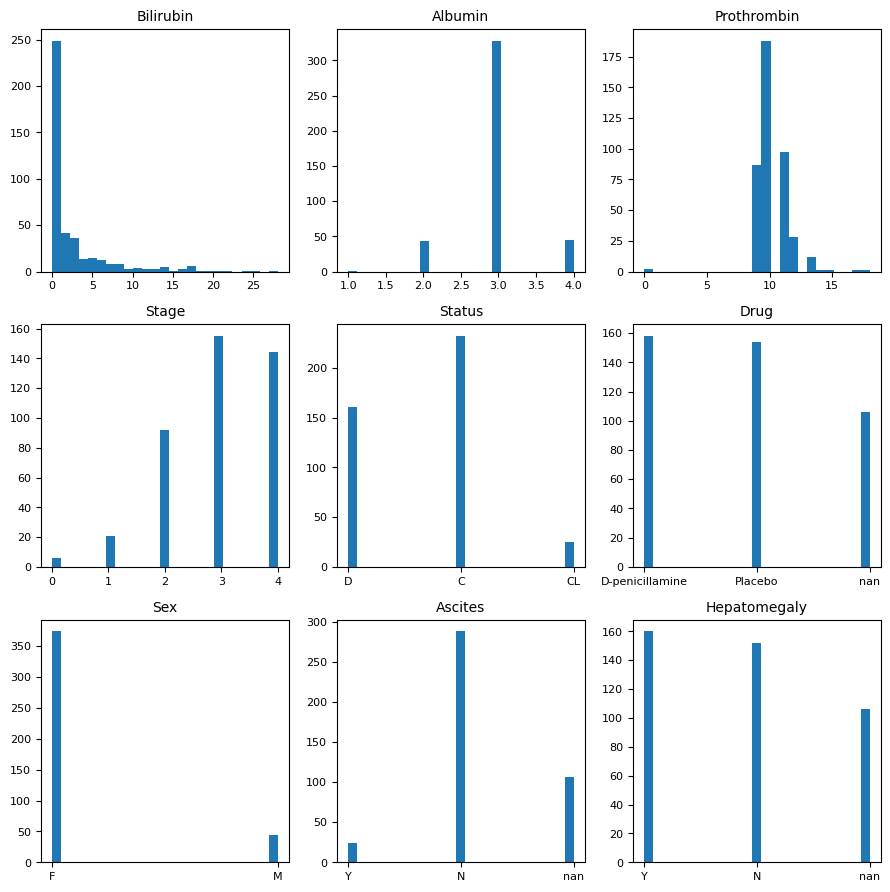

In [15]:
#df.plot.hist()
df_int = df.select_dtypes(include=['int']).copy()
df_float = df.select_dtypes(include=['float']).copy()
for col in df_float.columns:
    df_float[col] = df_float[col].fillna(0).astype(int) # replace non-finite values with 0 and cast to int
df_str = df.select_dtypes(include=['object']).copy()
for col in df_str.columns:
    df_str[col] = df_str[col].astype(str)
df_new = pd.concat([df_int, df_float, df_str], axis=1)
plotPerColumnDistribution(df_new,10, 3) #plotting histogram (Distribution graphs) for each column in dataset


Boxplot shows density of values in a box and less frequent values as line/circle drawn at their value point.


<Axes: xlabel='Status', ylabel='N_Days'>

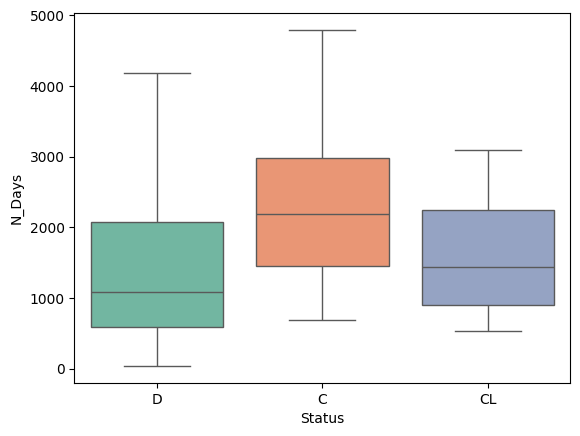

In [22]:
#draw boxplot for number of days patients registered before death (D) or censored (C) or censored due to transplant (CL)
sns.boxplot(df, x='Status', y='N_Days', hue='Status', palette='Set2', legend=False)

<Axes: xlabel='N_Days', ylabel='Count'>

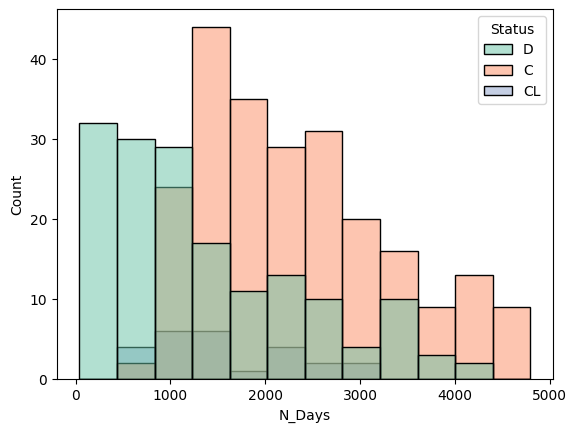

In [24]:
sns.histplot(df, x='N_Days', hue='Status', palette='Set2')

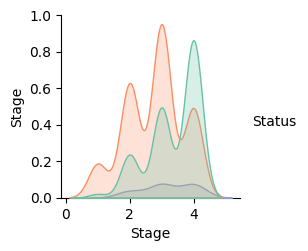

In [32]:
sns.pairplot(df[['Status','Stage']], hue='Status', palette='Set2')


In [77]:
df.select_dtypes(include=np.number).groupby(df['Status']).mean() #grouping by status and finding mean of each column


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
Status,,,,,,,,,,,,,
C,236.650862,2333.155172,18083.650862,1.575862,326.539474,3.593491,66.610778,1578.127381,107.285952,111.788079,261.158590,10.454113,2.773913
CL,249.520000,1546.200000,15228.520000,3.556000,439.500000,3.487600,124.000000,1535.210526,130.115789,133.944444,309.600000,10.360000,3.200000
D,164.161491,1376.931677,19694.540373,5.539130,415.754386,3.360559,135.411290,2594.353600,141.930720,140.486726,242.490323,11.190625,3.363057


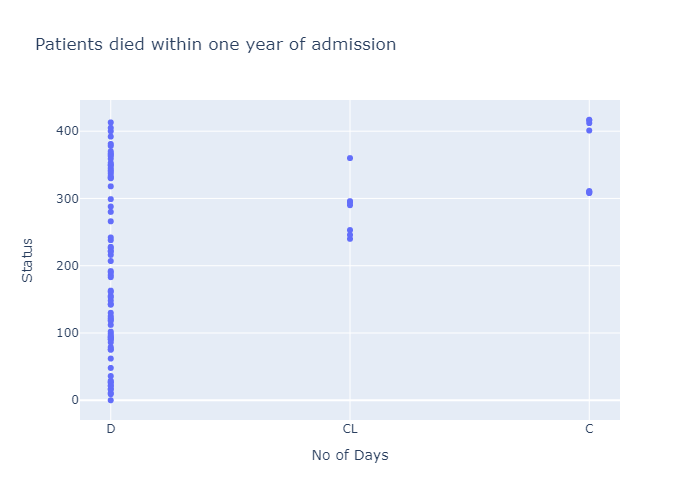

In [8]:
# Distribution of likelihood of people dying within year
fig = px.scatter(df.query('N_Days<1000'), x = 'Status', y =df.query('N_Days<1000').index, 
                title = 'Patients died within one year of admission')
fig.update_layout(xaxis_title='Status',
                    yaxis_title='No of Days')
fig.show('png')

later decide where to put "Yahan sa la kar statistics on dataset section tak"


In [9]:
#finding patients who's status is death 
df[df['Status']=='D']

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,382,221,D,NaN,18628,F,NaN,NaN,NaN,N,14.0,NaN,2.58,NaN,NaN,NaN,NaN,190.0,11.6,4.0
392,393,193,D,NaN,18993,F,NaN,NaN,NaN,S,0.7,NaN,2.96,NaN,NaN,NaN,NaN,319.0,9.9,4.0
400,401,935,D,NaN,25202,F,NaN,NaN,NaN,N,4.2,NaN,3.19,NaN,NaN,NaN,NaN,120.0,11.1,4.0
405,406,703,D,NaN,16802,F,NaN,NaN,NaN,N,4.5,NaN,2.68,NaN,NaN,NaN,NaN,219.0,11.5,4.0


In [6]:
df[(df['Status']=='D')&(df['N_Days']<365)] #finding patients who died within one year of admission

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0
11,12,304,D,Placebo,21600,F,N,N,Y,N,3.6,236.0,3.52,94.0,591.0,82.15,95.0,71.0,13.6,4.0
17,18,131,D,D-penicillamine,19698,F,N,Y,Y,Y,11.4,178.0,2.80,588.0,961.0,280.55,200.0,283.0,12.4,4.0
22,23,264,D,Placebo,20442,F,Y,Y,Y,Y,17.4,395.0,2.94,558.0,6064.8,227.04,191.0,214.0,11.7,4.0
26,27,77,D,Placebo,19884,F,Y,Y,Y,S,21.6,175.0,3.31,221.0,3697.4,101.91,168.0,80.0,12.0,4.0
29,30,321,D,Placebo,15116,F,N,Y,Y,N,3.6,260.0,2.54,172.0,7277.0,121.26,158.0,124.0,11.0,4.0
36,37,223,D,D-penicillamine,22546,F,Y,Y,N,Y,7.1,334.0,3.01,150.0,6931.2,180.60,118.0,102.0,12.0,4.0
75,76,71,D,D-penicillamine,18972,F,N,Y,Y,S,12.2,394.0,3.08,111.0,2132.0,155.00,243.0,165.0,11.6,4.0
76,77,326,D,Placebo,18199,F,N,Y,Y,S,6.6,244.0,3.41,199.0,1819.0,170.50,91.0,132.0,12.1,3.0
86,87,198,D,D-penicillamine,13616,F,N,N,N,N,1.1,345.0,4.40,75.0,1860.0,218.55,72.0,447.0,10.7,3.0


In [7]:
df[(df['Status']=='D')&(df['N_Days']<365)].count() #counting patients who died within one year of admission

ID               30
N_Days           30
Status           30
Drug             22
Age              30
Sex              30
Ascites          22
Hepatomegaly     22
Spiders          22
Edema            30
Bilirubin        30
Cholesterol      19
Albumin          30
Copper           22
Alk_Phos         22
SGOT             22
Tryglicerides    19
Platelets        30
Prothrombin      29
Stage            29
dtype: int64

In [95]:
print('Total deaths are:', (df['Status']=='D').sum()) #counting patients who died


Total deaths are: 161


In [91]:
total_deaths = df.query('Status=="D"') #finding features values of patients who died 
print("Total deaths: " + str(total_deaths))



Total deaths:       ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
5      6    2503      D          Placebo  24201   F       N            Y   
7      8    2466      D          Placebo  19379   F       N            N   
..   ...     ...    ...              ...    ...  ..     ...          ...   
381  382     221      D              NaN  18628   F     NaN          NaN   
392  393     193      D              NaN  18993   F     NaN          NaN   
400  401     935      D              NaN  25202   F     NaN          NaN   
405  406     703      D              NaN  16802   F     NaN          NaN   
413  414     681      D              NaN  24472   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    S

The normal range of alk_phos is 44 to 147.


In [13]:
#finding patients who's Alk_Phos value is abnormal and patient is still alive
patients=df[((df['Alk_Phos'] < 44) | (df['Alk_Phos'] > 150)) & (df['Status'] != 'D')]
print(patients['Alk_Phos']) #viewing patients Alk_Phos value

1      7394.8
4       671.0
6       824.0
12     1181.0
15      685.0
        ...  
307     797.0
308    1166.0
309    1713.0
310    1050.0
311    2115.0
Name: Alk_Phos, Length: 187, dtype: float64


In [ ]:
print(patients['Alk_Phos'].count()) #viewing patients who's Alk_Phos value is abnormal

#### Statistcs on Dataset


In [ ]:
#summary statistics of the dataset. Count means how many values per column, mean is average, standard deviation, min, max, 25%, 50%, 75% are quartiles 
df.describe().T #note describe shows information of numeric data only.

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


**Important:** Write down all numeric variables (features) from dataset columns and see if "describe()" shows statistics all of them? If not then there is issue in missing features. Find the issue to convert that column in numeric. 

In [49]:
df[df['Sex'] == 'F']['Age'].quantile([0.1, 0.5, 0.9])


0.1    13157.7
0.5    18333.0
0.9    23239.2
Name: Age, dtype: float64

In [48]:
quantiles = df['N_Days'].quantile([0.1, 0.5, 0.9])
print(quantiles)

0.1     606.8
0.5    1730.0
0.9    3524.2
Name: N_Days, dtype: float64


In [54]:
df.nunique() #finding total number of unique values in columns

ID               418
N_Days           399
Status             3
Drug               2
Age              344
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      201
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
dtype: int64

##### Finding and Imputing Missing Values


In [58]:
df.isnull().sum() #finding and counting missing values in all coumns
#df.isnull().sum() / len(df)*100 #finding percent of missing values in columns

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<Axes: >

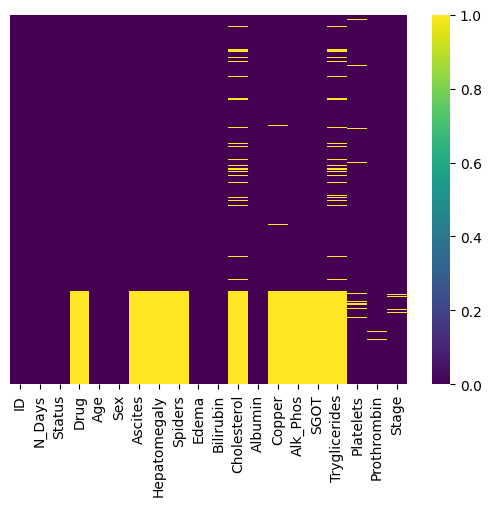

In [55]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis') #plotting heatmap to visualize missing values in columns of dataset

##### Deleting Unnecessary Columns


These could be columns which do not contribute in data driven decision making for the current problem. We should remove them from the data.

We’re using the drop() method with the specified column name.
For example, we are dropping column with too many missing values like 'type_sports'


In [23]:
df.drop(['type_sports'], axis=1,inplace=True) #first parameter is list of column names we want to remove, axis means row or column(1) and inplace means modify the existing DataFrame, and not create a new DataFrame 

In [25]:
df.columns

Index(['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortil

##### Imputing missing values


In [26]:
df['cuisine'].mean() #find mean value and use it to fill missing values. Generally used for NUMERIC variables

1.3888888888888888

In [27]:
df['cuisine'].median() #find median value and use it to fill missing values. Generally used for NUMERIC variables

1.0

In [39]:
df['cuisine'].mode()[0] #find mode and use it to fill missing values. Generally used for CATEGORICAL variables

1.0

In [33]:
df['cuisine'].fillna(df['cuisine'].median(), inplace=True) #filling missing values of cuisine column by it's median value

In [35]:
df.isnull().sum()

Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food                     1
comfort_food_reasons             2
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                          0
diet_current                     1
diet_current_coded               0
drink                            2
eating_changes                   3
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                        13
father_education                 1
father_profession                3
fav_cuisine                      2
fav_cuisine_coded                0
fav_food                         2
food_childhood                   1
fries               

Write down numeric variables and make them numeric

In [ ]:
df['']

#### Binning

Grouping of numerical data into few few categories to make some sense


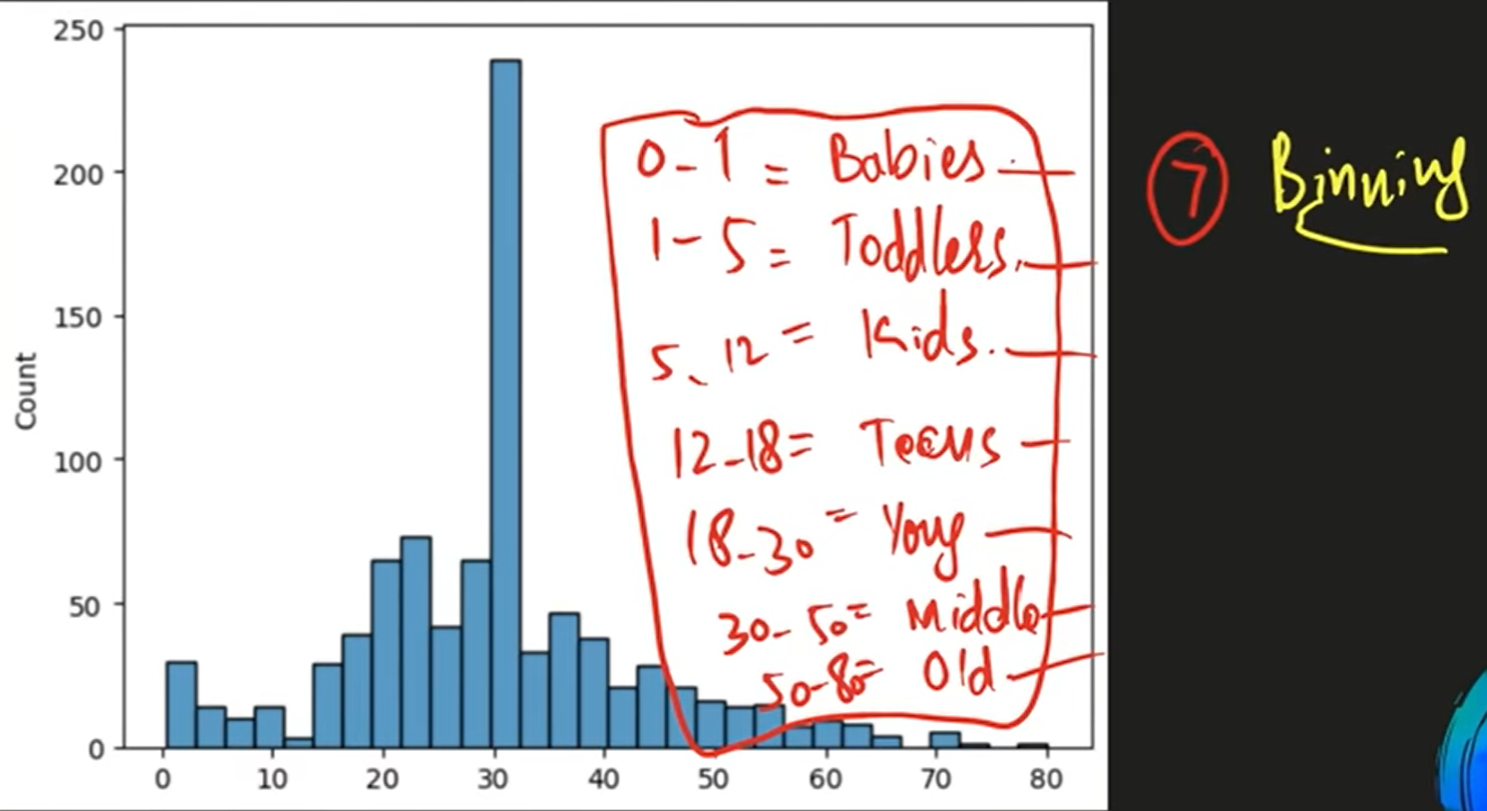


In [5]:
df.income.min() #minimum income of any student on a scale

6.0

In [ ]:
df.income.max() #maximum income of any student on a scale

##### Histogram of income

Students frequency in each category of income. Histogram provides us data distribution information.


<Axes: xlabel='income', ylabel='Count'>

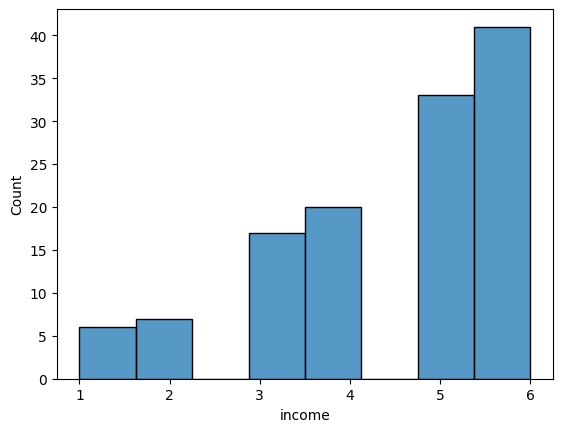

In [6]:
sns.histplot(df['income'])

Bining food choices data based on income ranges


In [9]:
bins=[1,2,3,4,5,6] #bins of food choices based on income
labels=['low','low mid','mid','high mid','high']
pd.cut(df['income'],bins=bins,labels=labels, ordered=False)

0      high mid
1           mid
2          high
3          high
4          high
         ...   
120         mid
121         low
122         low
123         mid
124    high mid
Name: income, Length: 125, dtype: category
Categories (5, object): ['low', 'low mid', 'mid', 'high mid', 'high']

#### Feature Engineering

Add binned_income column (feature) into dataframe


In [10]:
df['binned_income'] = pd.cut(df['income'],bins=bins,labels=labels, ordered=False)

In [11]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,binned_income
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1,1165.0,345,car racing,5,1,1315,187,high mid
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,2,725.0,690,Basketball,4,2,900,155,mid
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.,high
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240",high
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,4,940.0,500,Softball,4,2,760,190,high


In [12]:
df['binned_income'].value_counts()

binned_income
high        41
high mid    33
mid         20
low mid     17
low          7
Name: count, dtype: int64

In [13]:
df.rename(columns={'binned_income':'income_group'}, inplace=True)

In [14]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,income_group
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1,1165.0,345,car racing,5,1,1315,187,high mid
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,2,725.0,690,Basketball,4,2,900,155,mid
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.,high
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240",high
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,4,940.0,500,Softball,4,2,760,190,high


Grouping the data based on some feature


In [ ]:
df.groupby('STARS')['RATING'].mean() 

In [55]:
df.groupby(['STARS','VOTES'])['RATING'].mean()

STARS                                                                                                                                                                  VOTES 
\n                                                                                                                                                                     1,001     7.4
                                                                                                                                                                       1,019     6.5
                                                                                                                                                                       1,423     7.7
                                                                                                                                                                       1,544     7.3
                                                                                                      

In [57]:
df.groupby(['STARS','RATING']).size()    

STARS                                                                                                                                                                  RATING
\n                                                                                                                                                                     3.2       1
                                                                                                                                                                       3.6       1
                                                                                                                                                                       4.1       1
                                                                                                                                                                       4.3       1
                                                                                                              

Creating Corelation Matrix


In [ ]:
import re

# create a sample Series with strings containing numbers and NaN values
s = df['YEAR']
#preprocessing year column to extract only year from string
# extract numbers from the Series and skip NaN values
numbers = s.str.extractall(r'(\d+\.\d+|\d+)')[0].astype(int).dropna()

print(numbers)

In [ ]:
df['Gross'] = df['Gross'].str.replace(',', '.').astype(float) #converting string to float and ignoring commas
df['Gross'] = df['Gross'].str.replace('$', '').str.replace('M', '').astype(float) * 1000000 #converting string to float and ignoring $ and M and multiplying with 1000000

In [28]:
df['year'] = numbers.reset_index(drop=True) # reset the index of the extracted numbers

<Axes: >

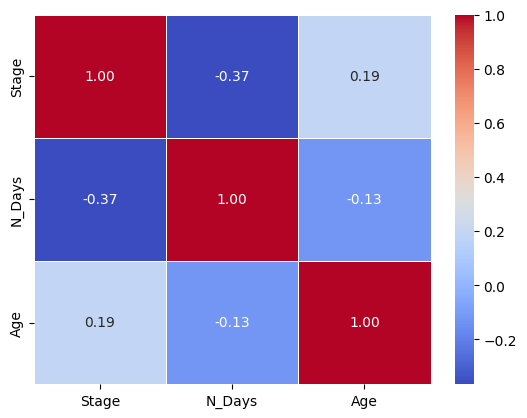

In [74]:
#correlation matrix to find correlation between columns

cor_mat = df.loc[:, ['Stage', 'N_Days', 'Age']].corr()
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f') #plotting heatmap to visualize correlation between columns of dataset


Interpreting correlation matrix.

If in a corr. matrix cell the value is close to '1', it means two values are linearly increasing, e.g., in cell (runtime vs gross) value is 0.34 means as runtime increases gross also increases but slowly as 0.34 is much less than 1.

Similarly, in a cell where value is negative, it means the parameters are inversely proportional, i.e., if one thing increases other decrease for example in cell (runtime vs rating) value is -0.22 which means rating decreases as runtime increases.


Summary of Data Exploration:

identify
unique values in dataset
find sum
value count
summary statistics
describe
groupby


### Python Libraries for Data Visualization


Python libraries for reports generation. Some includes

1. **Pandas profiling** helps us to generate HTML report with summaries, statistics, plots for exploring data etc.
   1. `_pip install ydata-profiling_` #create it inside new environment as it requires python <3.11
2. **Sweetviz:** create publication ready python EDA reports
3. **D-Tale:** visualize and explore pandas dataframe in web browser allowing sorting, filtering, plotting etc.
4. DataPrep: visualization library especially for outlier detection, correlation analysis etc.
5. **Autoviz:** Automated visualization library for selecting appropriate plot based on data type
6. **Lux:**
7. **skimpy:** library for summary statistics
   `1. *pip install skimpy*`
8. 


Pandas Profiling


first install ydata_profiling in environment

In [4]:
#create summary statistics of dataframe and store it in html file stored in same folder where current code file is present
profile = yd.ProfileReport(df)
profile.to_file(output_file='ydata_cirrhosis.html') 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]